# Neural Network with Back-Propagation


In [1]:
from NeuralNet import NeuralNet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Read and prepare data

### Load clean dataset and scale features

In [2]:
df = pd.read_csv('clean.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price']).values, df['price'].values, test_size=0.2, random_state=42)
# Scale the features using StandardScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a scaler for the target variable
y_scaler = MinMaxScaler()

# Reshape y to be a 2D array (required for scalers)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [7]:
X_train_scaled

array([[0.        , 0.        , 0.        , ..., 0.58507629, 0.2       ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.61310743, 0.8       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.22791435, 0.63333333,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.61310743, 0.6       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.15285896, 0.83333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.61310743, 0.7       ,
        0.        ]])

## Network initialization and model training

In [ ]:
# Input layer should have the same number of neurons as features in the dataset
layers = [27, 9, 5, 1]
nn = NeuralNet(layers, save=True)
# Now, train the neural network using the scaled data
nn.fit(X_train_scaled, y_train_scaled)

## Make predictions

In [4]:
# Optionally load a previously trained model nn.load_model(filename)
y_predicted  = nn.predict(X_test_scaled)
y_predicted_descaled = y_scaler.inverse_transform(y_predicted)

## Scatter plot and model assessment (MSE, MAE, MAPE)

In [5]:
from utils import print_errors

print_errors(y_test, y_predicted_descaled)

mean_squared_error :  54228319.01
mean_absolute_error :  5532.86
mean_absolute_percentage_error :  0.11


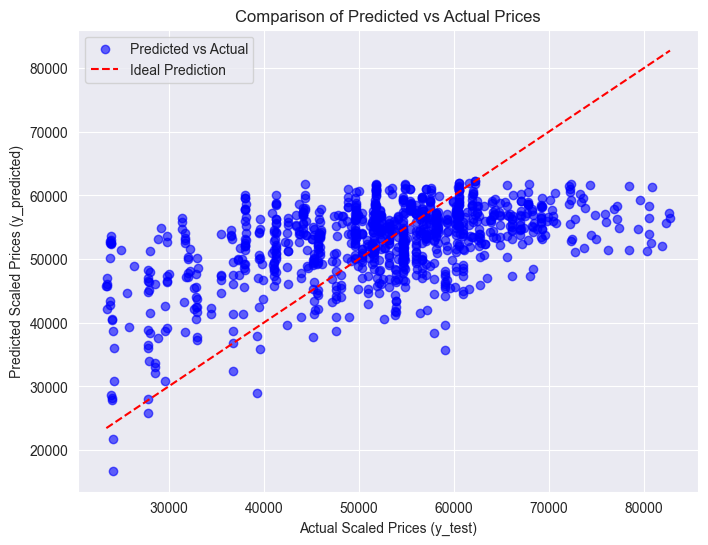

In [45]:
from utils import scatter
scatter(y_test, y_predicted_descaled)